In [34]:
import uproot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.display import display, Latex

form_title = {'family': 'helvetica', 'color': 'black', 'size': 15}
form_label = {'family': 'helvetica', 'color': 'black', 'size': 20}

exec(open('functions.py').read())

In [47]:
AND=" and ";   OR=" or ";   NOT=" not ";   cand0=" (__candidate__==0) ";   mycand=" (__candidate__==bBest) "
BpBmcut="( decayModeID==3005530 )";        B0B0cut="( decayModeID>=3005531 and decayModeID<=3005534 )"
roecuts="( nROE_Ch==0 and Eextra_ROE<1 )"
y4scuts="( cosBY0<1.1 and cosBY0>-1.9 and cosBY1<1.1 and cosBY1>-1.9 and (B0_decayModeID<500 or B1_decayModeID<500) )"
y4scuts_new = "( cosBY0<1.3 and cosBY0>-3.2 and cosBY1<1.1 and cosBY1>-1.9 )"
pipcut0="( (abs(pi4_B0_InvM-0.1395)<0.001 and pi4_1_B0_PDG!=22)"
pipcut1="( (abs(pi4_B1_InvM-0.1395)<0.001 and pi4_1_B1_PDG!=22)"
pipcut = '('+pipcut0 +OR+ pipcut1+')'
piptrue= '(('+pipcut0+AND+'(pi4_B0_isSignal==1))' +OR+ '('+pipcut1+AND+'(pi4_B1_isSignal==1))'+')'
pi0cut0="(abs(pi4_B0_InvM-0.135)<0.025 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
pi0cut1="(abs(pi4_B1_InvM-0.135)<0.025 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
pi0cut = '('+pi0cut0 +OR+ pi0cut1+')'
pi0wide0="(abs(pi4_B0_InvM-0.135)<0.050 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
pi0wide1="(abs(pi4_B1_InvM-0.135)<0.050 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
pi0wide = '('+pi0wide0 +OR+ pi0wide1+')'
pi0true0= '('+pi0wide0 +AND+ '(pi4_B0_isSignal==1)'+')'
pi0true1= '('+pi0wide1 +AND+ '(pi4_B1_isSignal==1)'+')'
pi0true = '('+pi0true0 +OR+ pi0true1+')'
pi0cutE0= '('+pi0cut0 +AND+ '(pi4_B0_ECM>0.35)'+')'
pi0cutE1= '('+pi0cut1 +AND+ '(pi4_B1_ECM>0.35)'+')'
pi0cutE = '('+pi0cutE0 +OR+ pi0cutE1+')'
pi0wideE0= '('+pi0wide0 +AND+ '(pi4_B0_ECM>0.35)'+')'
pi0wideE1= '('+pi0wide1 +AND+ '(pi4_B1_ECM>0.35)'+')'
pi0wideE = '('+pi0wideE0 +OR+ pi0wideE1+')'
pi0trueE0= '('+pi0true0 +AND+ '(pi4_B0_ECM>0.35)'+')'
pi0trueE1= '('+pi0true1 +AND+ '(pi4_B1_ECM>0.35)'+')'
pi0trueE = '('+pi0trueE0 +OR+ pi0trueE1+')'
etacut0 ="(abs(pi4_B0_InvM-0.547)<0.055 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
etacut1 ="(abs(pi4_B1_InvM-0.547)<0.055 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
etacut  = '('+etacut0 +OR+ etacut1+')'
etawide0="(abs(pi4_B0_InvM-0.547)<0.120 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
etawide1="(abs(pi4_B1_InvM-0.547)<0.120 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
etawide = '('+etawide0 +OR+ etawide1+')'
etatrue0= '('+etawide0 +AND+ '(pi4_B0_isSignal==1)'+')'
etatrue1= '('+etawide1 +AND+ '(pi4_B1_isSignal==1)'+')'
etatrue = '('+etatrue0 +OR+ etatrue1+')'

Bprec_eta = "((abs(B0_decayModeID-250)<160 and abs(B1_decayModeID-1650)<60) or (abs(B1_decayModeID-250)<160 and abs(B0_decayModeID-1650)<60))"
B0rec_eta = "((abs(B0_decayModeID-250)<160 and abs(B1_decayModeID-1450)<60) or (abs(B1_decayModeID-250)<160 and abs(B0_decayModeID-1450)<60))"


# format of labels
# label including this form2 will have these properties
form_title = {'family': 'helvetica', 'color': 'black', 'size': 15}
form_label = {'family': 'helvetica', 'color': 'black', 'size': 20}


mcNBB = 182500 * 2. *3000;   mclumi = mcNBB / 1100000.
print(f'Number of BB events (sum of B+B- and B0B0) = {mcNBB:6.3e}')
print(f'MC sample equivalent to {mclumi:.2f} fb-1')

Number of BB events (sum of B+B- and B0B0) = 1.095e+09
MC sample equivalent to 995.45 fb-1


In [9]:
# reconstructed eta modes plus etaSB
l_eta_Bp = [1600,1700,2600,2700]
eta_Bp = list(i+1 for i in l_eta_Bp) + l_eta_Bp

l_eta_B0 = [1400,1500,2400,2500]
eta_B0 = list(i+1 for i in l_eta_B0) + l_eta_B0

In [10]:
data = pd.read_pickle('semileptonic_Bdecay_data.pkl')

In [11]:
data.loc['charged']['__candidate__'].value_counts()

0    77294
1    65860
2    52691
3    44362
4    36731
5    32174
6    27200
7    24314
8    21087
Name: __candidate__, dtype: int64

In [6]:
# eta and etaSB modes reconstruction
df_eta_Bp = data.loc['charged'].query(
    f'((B0_decayModeID=={eta_Bp} & B1_decayModeID<500) | (B1_decayModeID=={eta_Bp} & B0_decayModeID<500))'
)

df_eta_B0 = data.loc['mixed'].query(
    f'((B0_decayModeID=={eta_B0} & B1_decayModeID<500) | (B1_decayModeID=={eta_B0} & B0_decayModeID<500))'
)

In [7]:
df_eta_Bp[df_eta_Bp['B0_decayModeID']<500]['B1_decayModeID'].value_counts()

2700.0    4887
1700.0    3896
2701.0    3561
2600.0    3417
1600.0    2809
1701.0    2680
2601.0    2507
1601.0    1877
Name: B1_decayModeID, dtype: int64

In [8]:
# eta
# splitting signal and background ****charged B****

# background
dfp_bkg = df_eta_Bp.drop(
    df_eta_Bp[
        ( ((df_eta_Bp['aBplusMode']%10000).isin([1019,1020,1039,1040])) | (abs(df_eta_Bp['aBminusMode'])%10000).isin([1019,1020,1039,1040]) )
        &( (df_eta_Bp['pi4_B0_isSignal']==1) | (df_eta_Bp['pi4_B1_isSignal']==1) ) 
    ].index, inplace=False
)

# splitting peaking and combinatoprial background
dfp_pkbkg = dfp_bkg[
    ( (~(dfp_bkg['aBplusMode']%10000).isin([1019,1020,1039,1040])) & (~(abs(dfp_bkg['aBminusMode'])%10000).isin([1019,1020,1039,1040])) )
    &( (dfp_bkg['pi4_B0_isSignal']==1) | (dfp_bkg['pi4_B1_isSignal']==1) ) 
]

dfp_combkg = dfp_bkg.drop(
    dfp_bkg[
        ( (~(dfp_bkg['aBplusMode']%10000).isin([1019,1020,1039,1040])) & (~(abs(dfp_bkg['aBminusMode'])%10000).isin([1019,1020,1039,1040])) )
        &( (dfp_bkg['pi4_B0_isSignal']==1) | (dfp_bkg['pi4_B1_isSignal']==1) )
    ].index
)

# signal
dfp_sig = df_eta_Bp[
    ( ((df_eta_Bp['aBplusMode']%10000).isin([1019,1020,1039,1040])) | (abs(df_eta_Bp['aBminusMode'])%10000).isin([1019,1020,1039,1040]) )
    &( (df_eta_Bp['pi4_B0_isSignal']==1) | (df_eta_Bp['pi4_B1_isSignal']==1) ) 
]


dfp = pd.concat([dfp_sig, dfp_pkbkg, dfp_combkg], keys=['signal', 'peaking background', 'combinatorial background'])

In [9]:
# eta
# splitting signal and background ****mixed B****

# background
df0_bkg = df_eta_B0.drop(
    df_eta_B0[
        ( ((df_eta_B0['aB0Mode']%10000).isin([1017,1018,1035,1036])) | (abs(df_eta_B0['aBbar0Mode'])%10000).isin([1017,1018,1035,1036]) )
        &( (df_eta_B0['pi4_B0_isSignal']==1) | (df_eta_B0['pi4_B1_isSignal']==1) ) 
    ].index, inplace=False
)

# solitting peaking and combinatoprial background
df0_pkbkg = df0_bkg[
    ( (~(df0_bkg['aB0Mode']%10000).isin([1017,1018,1035,1036])) & (~(abs(df0_bkg['aBbar0Mode'])%10000).isin([1017,1018,1035,1036])) )
    &( (df0_bkg['pi4_B0_isSignal']==1) | (df0_bkg['pi4_B1_isSignal']==1) ) 
]

df0_combkg = df0_bkg.drop(
    df0_bkg[
        ( (~(df0_bkg['aB0Mode']%10000).isin([1017,1018,1035,1036])) & (~(abs(df0_bkg['aBbar0Mode'])%10000).isin([1017,1018,1035,1036])) )
        &( (df0_bkg['pi4_B0_isSignal']==1) | (df0_bkg['pi4_B1_isSignal']==1) )
    ].index
)

# signal
df0_sig = df_eta_B0[
    ( ((df_eta_B0['aB0Mode']%10000).isin([1017,1018,1035,1036])) | (abs(df_eta_B0['aBbar0Mode'])%10000).isin([1017,1018,1035,1036]) )
    &( (df_eta_B0['pi4_B0_isSignal']==1) | (df_eta_B0['pi4_B1_isSignal']==1) ) 
]

df0 = pd.concat([df0_sig, df0_pkbkg, df0_combkg], keys=['signal', 'peaking background', 'combinatorial background'])

In [10]:
# combining the charged and mixed data set
# eta
df = pd.concat([dfp,df0])
df

__experiment__  __run__  __event__  \
signal                   1400              1003        0   11916538   
                         1402              1003        0   11916538   
                         1404              1003        0   11916538   
                         1768              1003        0   27178608   
                         1772              1003        0   27178608   
...                                         ...      ...        ...   
combinatorial background 430838            1003        0     657322   
                         430964            1003        0     201590   
                         430994            1003        0    1146893   
                         431038            1003        0     308753   
                         431039            1003        0     308753   

                                 __production__  __candidate__  \
signal                   1400             24816              0   
                         1402             24816              2   
                         1404             24816              4   
                         1768             24816              4   
                         1772             24816              8   
...                                         ...            ...   
combinatorial background 430838           25056              1   
                         430964           25056              0   
                         430994           25056              0   
                         431038           25056              2   
                         431039           25056              3   

                                 __ncandidates__  __weight__       Ecms  \
signal                   1400                  9         1.0  10.579557   
                         1402                  9         1.0  10.579557   
                         1404                  9         1.0  10.579557   
                         1768                  9         1.0  10.579557   
                         1772                  9         1.0  10.579557   
...                                          ...         ...        ...   
combinatorial background 430838                3         1.0  10.579557   
                         430964                9         1.0  10.579557   
                         430994                9         1.0  10.579557   
                         431038                9         1.0  10.579557   
                         431039                9         1.0  10.579557   

                                 aBminusMode  aBplusMode  ...  MCGenPDG_45  \
signal                   1400        -1001.0      1020.0  ...          NaN   
                         1402        -1001.0      1020.0  ...          NaN   
                         1404        -1001.0      1020.0  ...          NaN   
                         1768      -101003.0    101020.0  ...          NaN   
                         1772      -101003.0    101020.0  ...          NaN   
...                                      ...         ...  ...          ...   
combinatorial background 430838        -99.0       -99.0  ...          NaN   
                         430964        -99.0       -99.0  ...          NaN   
                         430994        -99.0       -99.0  ...          NaN   
                         431038        -99.0       -99.0  ...          NaN   
                         431039        -99.0       -99.0  ...          NaN   

                                 MCGenMothIndex_45  MCGenPDG_46  \
signal                   1400                  NaN          NaN   
                         1402                  NaN          NaN   
                         1404                  NaN          NaN   
                         1768                  NaN          NaN   
                         1772                  NaN          NaN   
...                                            ...          ...   
combinatorial background 430838                NaN          NaN   
             

# signal and background InvM $\gamma\gamma$ using the wrong method and no best Candidate

In [11]:
# plotting the invariant mass of eta for both signal and background
# Note: signal is the combination of signal and peaking background

# Invariant mass of eta: signal + peaking background of both B0 and B1

# eta
eta_sig_InvM = pd.concat(
    [
        df.loc['signal']['pi4_B0_InvM'],df.loc['signal']['pi4_B1_InvM'],
        df.loc['peaking background']['pi4_B0_InvM'],df.loc['peaking background']['pi4_B1_InvM']
    ]
)
# Invariant mass of eta: combinatorial background of both B0 and B1
eta_bkg_InvM = pd.concat([df.loc['combinatorial background']['pi4_B0_InvM'],df.loc['combinatorial background']['pi4_B1_InvM']])

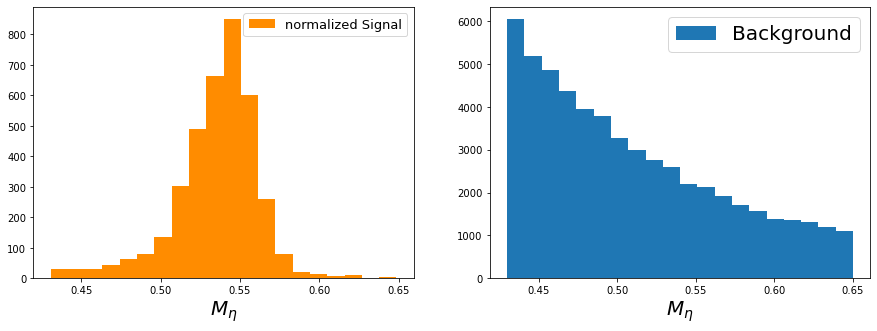

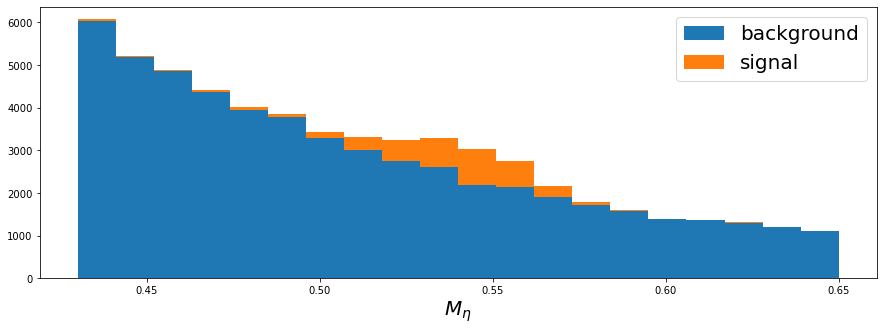

In [12]:
# data invariant mass of eta signal (signal + peaking background)
data_sig = eta_sig_InvM.dropna()
data_bkg = eta_bkg_InvM.dropna()

# plot the histogram
plt.figure(figsize=(15,5))
plt.subplot(121)
counts_sig, edges, _ = plt.hist(data_sig, bins=20, label='normalized Signal', color='darkorange')
plt.xlabel('$M_{\eta}$', fontdict=form_label)
plt.legend(fontsize=13)

plt.subplot(122)
counts_bkg, edges, _ = plt.hist(data_bkg, bins=20, label='Background')
plt.xlabel('$M_{\eta}$', fontdict=form_label)
plt.legend(fontsize=20)

plt.figure(figsize=(15,5))
counts, edges, _ = plt.hist([data_bkg, data_sig], bins=20, label=['background', 'signal'], histtype='barstacked')
plt.xlabel('$M_{\eta}$', fontdict=form_label)
plt.legend(fontsize=20)

# making the size of x and y data the same
y_data = counts[0]+(counts[1]-counts[0])
x_data = (edges[:-1] + edges[1:]) / 2


## How many signal do we get in this method

It's quit a lot, remember I didn't consider the best candidate here

In [13]:
# how many signal enteries do we have
np.sum(counts[1]-counts[0]), len(data_sig)

(3713.0, 3713)

##### There was a problem in the way I defined signal because I reconstructed seperately and asked for generated mode seperately sometimes the I took the wrong B what I meant is that I reconstructed B0 as $D\eta l\nu$ but B1 was actully generated $D\eta l\nu$

In [14]:
pd.set_option('display.max_columns', 907)
# charged
# check for signal if the same B reconstructd as Detalnu generated as Detalnu
c = dfp[
    ( (dfp['B0_decayModeID']<500) & (abs(dfp['aBminusMode'])%10000).isin([1019,1020,1039,1040]) )
    |
    ( (dfp['B1_decayModeID']<500) & (dfp['aBplusMode']%10000).isin([1019,1020,1039,1040]) )
]

c.loc['signal']

__experiment__  __run__  __event__  __production__  __candidate__  \
3772              1003        0   16764827           24816              2   
3778              1003        0   16764827           24816              8   
7562              1003        0   29668431           24816              8   
8866              1003        0   40398370           24816              0   
8868              1003        0   40398370           24816              2   
...                ...      ...        ...             ...            ...   
786208            1003        0   24311593           24820              0   
786209            1003        0   24311593           24820              1   
786210            1003        0   24311593           24820              2   
787806            1003        0   29878168           24820              4   
787807            1003        0   29878168           24820              5   

        __ncandidates__  __weight__       Ecms  aBminusMode  aBplusMode  \
3772                  9         1.0  10.579557      -1002.0      1040.0   
3778                  9         1.0  10.579557      -1002.0      1040.0   
7562                  9         1.0  10.579557      -1019.0      1021.0   
8866                  9         1.0  10.579557      -1040.0    101001.0   
8868                  9         1.0  10.579557      -1040.0    101001.0   
...                 ...         ...        ...          ...         ...   
786208                9         1.0  10.579557      -1039.0      1001.0   
786209                9         1.0  10.579557      -1039.0      1001.0   
786210                9         1.0  10.579557      -1039.0      1001.0   
787806                9         1.0  10.579557      -1002.0    101019.0   
787807                9         1.0  10.579557      -1002.0    101019.0   

        aB0Mode  aBbar0Mode  aDstminusMode  aDstplusMode  aDminusMode  \
3772      -99.0       -99.0          -99.0         -99.0        -99.0   
3778      -99.0       -99.0          -99.0         -99.0        -99.0   
7562      -99.0       -99.0          -99.0         -99.0        -99.0   
8866      -99.0       -99.0          -99.0         -99.0        -99.0   
8868      -99.0       -99.0          -99.0         -99.0        -99.0   
...         ...         ...            ...           ...          ...   
786208    -99.0       -99.0          -99.0         -99.0        -99.0   
786209    -99.0       -99.0          -99.0         -99.0        -99.0   
786210    -99.0       -99.0          -99.0         -99.0        -99.0   
787806    -99.0       -99.0          -99.0         -99.0        -99.0   
787807    -99.0       -99.0          -99.0         -99.0        -99.0   

        aDplusMode   aD0Mode  aDbar0Mode       ECM       pCM      InvM  \
3772         -99.0  101017.0     -1032.0  8.870992  1.211343  8.786463   
3778         -99.0  101017.0     -1032.0  8.853800  1.264598  8.761453   
7562         -99.0    1010.0     -1036.0  8.019733  1.466358  7.885585   
8866         -99.0    1017.0     -1038.0  8.975946  1.105870  8.907717   
8868         -99.0    1017.0     -1038.0  9.123243  1.124581  9.053838   
...            ...       ...         ...       ...       ...       ...   
786208       -99.0    1036.0     -1032.0  9.326741  0.902721  9.282877   
786209       -99.0    1036.0     -1032.0  9.347290  0.899746  9.303906   
786210       -99.0    1036.0     -1032.0  9.134544  0.826070  9.096788   
787806       -99.0    1017.0     -1036.0  7.797162  2.170948  7.489491   
787807       -99.0    1017.0     -1036.0  7.740451  2.101054  7.450339   

         cosThCM     phiCM     PDG  nROE_Ch  nROE_ECL  nROE_KL  nROE_gam  \
3772   -0.712406 -0.843213  300553      0.0       1.0      0.0       1.0   
3778   -0.740381 -0.859389  300553      0.0       2.0      0.0       2.0   
7562    0.280592 -2.972437  300553      0.0       4.0      0.0       4.0   
8866    0.915934  2.096327  300553      0.0       3.0      1.0       3.0   
8868    0.894779  2.108739  300553  

In [15]:
# charged
# check for ***peaking background*** if the same B reconstructd as Detalnu generated as Detalnu
p = dfp.loc['peaking background'][
    ((dfp.loc['peaking background']['B0_decayModeID']<500) & (dfp.loc['peaking background']['aB0Mode']%10000).isin([1017,1018,1035,1036]))
    |
    ((dfp.loc['peaking background']['B1_decayModeID']<500) & (abs(dfp.loc['peaking background']['aBbar0Mode'])%10000).isin([1017,1018,1035,1036]))
]
p

,__experiment__,__run__,__event__,__production__,__candidate__,__ncandidates__,__weight__,Ecms,aBminusMode,aBplusMode,aB0Mode,aBbar0Mode,aDstminusMode,aDstplusMode,aDminusMode,aDplusMode,aD0Mode,aDbar0Mode,ECM,pCM,InvM,cosThCM,phiCM,PDG,nROE_Ch,nROE_ECL,nROE_KL,nROE_gam,Q_ROE,M_ROE,Eextra_ROE,R2,cosTBTO,M_roepi0,pCM_roepi0,phiCM_roepi0,cosThCM_roepi0,ECM_roegam,phiCM_roegam,cosThCM_roegam,pCM_roepi,phiCM_roepi,cosThCM_roepi,q_roepi,isSignal,Y4Sprod,Y4Sproduct,Y4SScore,Y4SScore4,decayModeID,cosBY0,cosBY1,cosDel,cosDelRange,B0_ECM,B0_pCM,B0_InvM,B0_cosThCM,B0_phiCM,B0_PDG,B0_BchiProb,B0_BflightDistance,B0_BflightDistanceErr,B0_B_dr,B0_B_dz,B0_B_x,B0_B_y,B0_B_z,B0_B_x_uncertainty,B0_B_y_uncertainty,B0_B_z_uncertainty,B0_isSignal,B0_mcErrors,B0_mcPDG,B0_genMotherID_0,B0_genMotherPDG_0,B0_genMotherPDG_1,B0_isSignalAcceptMissing,B0_decayModeID,B0_cosBY,B0_Pi0orEtaScore,B1_ECM,B1_pCM,B1_InvM,B1_cosThCM,B1_phiCM,B1_PDG,B1_BchiProb,B1_BflightDistance,B1_BflightDistanceErr,B1_B_dr,B1_B_dz,B1_B_x,B1_B_y,B1_B_z,B1_B_x_uncertainty,B1_B_y_uncertainty,B1_B_z_uncertainty,B1_isSignal,B1_mcErrors,B1_mcPDG,B1_genMotherID_0,B1_genMotherPDG_0,B1_genMotherPDG_1,B1_isSignalAcceptMissing,B1_decayModeID,B1_cosBY,B1_Pi0orEtaScore,e_B0_ECM,e_B0_pCM,e_B0_InvM,e_B0_cosThCM,e_B0_phiCM,e_B0_PDG,e_B0_isSignal,e_B0_mcErrors,e_B0_mcPDG,e_B0_genMotherID_0,e_B0_genMotherPDG_0,e_B0_genMotherPDG_1,e_B0_isSignalAcceptMissing,e_B0_electronID,e_B0_muonID,e_B1_ECM,e_B1_pCM,e_B1_InvM,e_B1_cosThCM,e_B1_phiCM,e_B1_PDG,e_B1_isSignal,e_B1_mcErrors,e_B1_mcPDG,e_B1_genMotherID_0,e_B1_genMotherPDG_0,e_B1_genMotherPDG_1,e_B1_isSignalAcceptMissing,e_B1_electronID,e_B1_muonID,D_B0_ECM,D_B0_pCM,D_B0_InvM,D_B0_cosThCM,D_B0_phiCM,D_B0_PDG,D_B0_BFInvM,D_B0_DchiProb,D_B0_DflightDistance,D_B0_DflightDistanceErr,D_B0_mcECM,D_B0_mcPCM,D_B0_mcThetaCM,D_B0_mcPhiCM,D_B0_isSignal,D_B0_mcErrors,D_B0_mcPDG,D_B0_genMotherID_0,D_B0_genMotherPDG_0,D_B0_genMotherPDG_1,D_B0_genMotherPDG_2,D_B0_isSignalAcceptMissing,D_B0_decayModeID,D_B1_ECM,D_B1_pCM,D_B1_InvM,D_B1_cosThCM,D_B1_phiCM,D_B1_PDG,D_B1_BFInvM,D_B1_DchiProb,D_B1_DflightDistance,D_B1_DflightDistanceErr,D_B1_mcECM,D_B1_mcPCM,D_B1_mcThetaCM,D_B1_mcPhiCM,D_B1_isSignal,D_B1_mcErrors,D_B1_mcPDG,D_B1_genMotherID_0,D_B1_genMotherPDG_0,D_B1_genMotherPDG_1,D_B1_genMotherPDG_2,D_B1_isSignalAcceptMissing,D_B1_decayModeID,D_0_B0_ECM,D_0_B0_pCM,D_0_B0_InvM,D_0_B0_cosThCM,D_0_B0_phiCM,D_0_B0_PDG,D_0_B0_BFInvM,D_0_B0_DchiProb,D_0_B0_DflightDistance,D_0_B0_DflightDistanceErr,D_0_B0_mcECM,D_0_B0_mcPCM,D_0_B0_mcThetaCM,D_0_B0_mcPhiCM,D_0_B0_isSignal,D_0_B0_mcErrors,D_0_B0_mcPDG,D_0_B0_genMotherID_0,D_0_B0_genMotherPDG_0,D_0_B0_genMotherPDG_1,D_0_B0_genMotherPDG_2,D_0_B0_isSignalAcceptMissing,D_0_B0_decayModeID,D_0_0_B0_ECM,D_0_0_B0_pCM,D_0_0_B0_InvM,D_0_0_B0_cosThCM,D_0_0_B0_phiCM,D_0_0_B0_PDG,D_0_0_B0_mcECM,D_0_0_B0_mcPCM,D_0_0_B0_mcThetaCM,D_0_0_B0_mcPhiCM,D_0_0_B0_isSignal,D_0_0_B0_mcErrors,D_0_0_B0_mcPDG,D_0_0_B0_genMotherID_0,D_0_0_B0_genMotherPDG_0,D_0_0_B0_genMotherPDG_1,D_0_0_B0_genMotherPDG_2,D_0_0_B0_isSignalAcceptMissing,D_0_0_0_B0_ECM,D_0_0_0_B0_pCM,D_0_0_0_B0_InvM,D_0_0_0_B0_cosThCM,D_0_0_0_B0_phiCM,D_0_0_0_B0_PDG,D_0_0_0_B0_mcECM,D_0_0_0_B0_mcPCM,D_0_0_0_B0_mcThetaCM,D_0_0_0_B0_mcPhiCM,D_0_0_0_B0_isSignal,D_0_0_0_B0_mcErrors,D_0_0_0_B0_mcPDG,D_0_0_0_B0_genMotherID_0,D_0_0_0_B0_genMotherPDG_0,D_0_0_0_B0_genMotherPDG_1,D_0_0_0_B0_genMotherPDG_2,D_0_0_0_B0_isSignalAcceptMissing,D_0_0_1_B0_ECM,D_0_0_1_B0_pCM,D_0_0_1_B0_InvM,D_0_0_1_B0_cosThCM,D_0_0_1_B0_phiCM,D_0_0_1_B0_PDG,D_0_0_1_B0_mcECM,D_0_0_1_B0_mcPCM,D_0_0_1_B0_mcThetaCM,D_0_0_1_B0_mcPhiCM,D_0_0_1_B0_isSignal,D_0_0_1_B0_mcErrors,D_0_0_1_B0_mcPDG,D_0_0_1_B0_genMotherID_0,D_0_0_1_B0_genMotherPDG_0,D_0_0_1_B0_genMotherPDG_1,D_0_0_1_B0_genMotherPDG_2,D_0_0_1_B0_isSignalAcceptMissing,D_0_1_B0_ECM,D_0_1_B0_pCM,D_0_1_B0_InvM,D_0_1_B0_cosThCM,D_0_1_B0_phiCM,D_0_1_B0_PDG,D_0_1_B0_mcECM,D_0_1_B0_mcPCM,D_0_1_B0_mcThetaCM,D_0_1_B0_mcPhiCM,D_0_1_B0_isSignal,D_0_1_B0_mcErrors,D_0_1_B0_mcPDG,D_0_1_B0_gen

In [16]:
# mixed
# check for signal if the same B reconstructd as Detalnu generated as Detalnu
n = df0[
    ((df0['B0_decayModeID']<500) & (abs(df0['aBbar0Mode'])%10000).isin([1017,1018,1035,1036]))
    |
    ((df0['B1_decayModeID']<500) & (df0['aB0Mode']%10000).isin([1017,1018,1035,1036]))
]
n.loc['signal']

__experiment__  __run__  __event__  __production__  __candidate__  \
1929              1003        0   25578865           24821              0   
4665              1003        0   17894749           24821              2   
5867              1003        0   33901681           24821              5   
20042             1003        0   19883881           24821              2   
25865             1003        0   39616645           24821              0   
...                ...      ...        ...             ...            ...   
423519            1003        0   14621674           24825              3   
427433            1003        0   72824308           24825              0   
427847            1003        0   87835928           24825              0   
427848            1003        0   87835928           24825              1   
427855            1003        0   87835928           24825              8   

        __ncandidates__  __weight__       Ecms  aBminusMode  aBplusMode  \
1929                  1         1.0  10.579557        -99.0       -99.0   
4665                  4         1.0  10.579557        -99.0       -99.0   
5867                  8         1.0  10.579557        -99.0       -99.0   
20042                 9         1.0  10.579557        -99.0       -99.0   
25865                 8         1.0  10.579557        -99.0       -99.0   
...                 ...         ...        ...          ...         ...   
423519                7         1.0  10.579557        -99.0       -99.0   
427433                2         1.0  10.579557        -99.0       -99.0   
427847                9         1.0  10.579557        -99.0       -99.0   
427848                9         1.0  10.579557        -99.0       -99.0   
427855                9         1.0  10.579557        -99.0       -99.0   

         aB0Mode  aBbar0Mode  aDstminusMode  aDstplusMode  aDminusMode  \
1929      1019.0     -1035.0        -1001.0         -99.0        -99.0   
4665      1017.0   -101003.0          -99.0        1002.0      -1033.0   
5867    101001.0     -1018.0        -1001.0        1001.0        -99.0   
20042     1019.0     -1036.0        -1002.0        1001.0      -1033.0   
25865     1017.0    101002.0          -99.0         -99.0      -1025.0   
...          ...         ...            ...           ...          ...   
423519    1003.0     -1017.0          -99.0         -99.0        -99.0   
427433  101019.0     -1018.0        -1001.0        1001.0        -99.0   
427847  101017.0    101001.0        -1001.0         -99.0      -1066.0   
427848  101017.0    101001.0        -1001.0         -99.0      -1066.0   
427855  101017.0    101001.0        -1001.0         -99.0      -1066.0   

        aDplusMode  aD0Mode  aDbar0Mode       ECM       pCM      InvM  \
1929        1033.0    -99.0     -1017.0  9.140312  0.950611  9.094776   
4665        1033.0    -99.0       -99.0  7.437908  0.725203  7.402852   
5867         -99.0   1036.0     -1046.0  8.820972  0.712034  8.796838   
20042        -99.0   1032.0       -99.0  8.558748  1.406903  8.442979   
25865        -99.0    -99.0       -99.0  9.471390  1.116947  9.414472   
...            ...      ...         ...       ...       ...       ...   
423519      1033.0    -99.0     -1036.0  8.062080  1.656334  7.890006   
427433       -99.0   1036.0     -1038.0  8.695824  0.790438  8.662491   
427847       -99.0    -99.0     -1032.0  9.048684  1.912892  8.849408   
427848       -99.0    -99.0     -1032.0  8.804920  1.717994  8.635996   
427855       -99.0    -99.0     -1032.0  8.804920  1.717994  8.633780   

         cosThCM     phiCM     PDG  nROE_Ch  nROE_ECL  nROE_KL  nROE_gam  \
1929   -0.255689 -0.861903  300553      0.0       1.0      0.0       1.0   
4665   -0.154403 -2.343645  300553      0.0       5.0      0.0       5.0   
5867   -0.603585  3.120771  300553      0.0       4.0      0.0       4.0   
20042  -0.820413 -1.552898  300553      0.0       2.0      1.0       2.0   
25865   0.816284  2.965383  300553  

In [17]:
# mixed
# check for ***peaking background*** if the same B reconstructd as Detalnu generated as Detalnu
p0 = df0.loc['peaking background'][
    ((df0.loc['peaking background']['B0_decayModeID']<500) & (df0.loc['peaking background']['aB0Mode']%10000).isin([1017,1018,1035,1036]))
    |
    ((df0.loc['peaking background']['B1_decayModeID']<500) & (abs(df0.loc['peaking background']['aBbar0Mode'])%10000).isin([1017,1018,1035,1036]))
]
p0

,__experiment__,__run__,__event__,__production__,__candidate__,__ncandidates__,__weight__,Ecms,aBminusMode,aBplusMode,aB0Mode,aBbar0Mode,aDstminusMode,aDstplusMode,aDminusMode,aDplusMode,aD0Mode,aDbar0Mode,ECM,pCM,InvM,cosThCM,phiCM,PDG,nROE_Ch,nROE_ECL,nROE_KL,nROE_gam,Q_ROE,M_ROE,Eextra_ROE,R2,cosTBTO,M_roepi0,pCM_roepi0,phiCM_roepi0,cosThCM_roepi0,ECM_roegam,phiCM_roegam,cosThCM_roegam,pCM_roepi,phiCM_roepi,cosThCM_roepi,q_roepi,isSignal,Y4Sprod,Y4Sproduct,Y4SScore,Y4SScore4,decayModeID,cosBY0,cosBY1,cosDel,cosDelRange,B0_ECM,B0_pCM,B0_InvM,B0_cosThCM,B0_phiCM,B0_PDG,B0_BchiProb,B0_BflightDistance,B0_BflightDistanceErr,B0_B_dr,B0_B_dz,B0_B_x,B0_B_y,B0_B_z,B0_B_x_uncertainty,B0_B_y_uncertainty,B0_B_z_uncertainty,B0_isSignal,B0_mcErrors,B0_mcPDG,B0_genMotherID_0,B0_genMotherPDG_0,B0_genMotherPDG_1,B0_isSignalAcceptMissing,B0_decayModeID,B0_cosBY,B0_Pi0orEtaScore,B1_ECM,B1_pCM,B1_InvM,B1_cosThCM,B1_phiCM,B1_PDG,B1_BchiProb,B1_BflightDistance,B1_BflightDistanceErr,B1_B_dr,B1_B_dz,B1_B_x,B1_B_y,B1_B_z,B1_B_x_uncertainty,B1_B_y_uncertainty,B1_B_z_uncertainty,B1_isSignal,B1_mcErrors,B1_mcPDG,B1_genMotherID_0,B1_genMotherPDG_0,B1_genMotherPDG_1,B1_isSignalAcceptMissing,B1_decayModeID,B1_cosBY,B1_Pi0orEtaScore,e_B0_ECM,e_B0_pCM,e_B0_InvM,e_B0_cosThCM,e_B0_phiCM,e_B0_PDG,e_B0_isSignal,e_B0_mcErrors,e_B0_mcPDG,e_B0_genMotherID_0,e_B0_genMotherPDG_0,e_B0_genMotherPDG_1,e_B0_isSignalAcceptMissing,e_B0_electronID,e_B0_muonID,e_B1_ECM,e_B1_pCM,e_B1_InvM,e_B1_cosThCM,e_B1_phiCM,e_B1_PDG,e_B1_isSignal,e_B1_mcErrors,e_B1_mcPDG,e_B1_genMotherID_0,e_B1_genMotherPDG_0,e_B1_genMotherPDG_1,e_B1_isSignalAcceptMissing,e_B1_electronID,e_B1_muonID,D_B0_ECM,D_B0_pCM,D_B0_InvM,D_B0_cosThCM,D_B0_phiCM,D_B0_PDG,D_B0_BFInvM,D_B0_DchiProb,D_B0_DflightDistance,D_B0_DflightDistanceErr,D_B0_mcECM,D_B0_mcPCM,D_B0_mcThetaCM,D_B0_mcPhiCM,D_B0_isSignal,D_B0_mcErrors,D_B0_mcPDG,D_B0_genMotherID_0,D_B0_genMotherPDG_0,D_B0_genMotherPDG_1,D_B0_genMotherPDG_2,D_B0_isSignalAcceptMissing,D_B0_decayModeID,D_B1_ECM,D_B1_pCM,D_B1_InvM,D_B1_cosThCM,D_B1_phiCM,D_B1_PDG,D_B1_BFInvM,D_B1_DchiProb,D_B1_DflightDistance,D_B1_DflightDistanceErr,D_B1_mcECM,D_B1_mcPCM,D_B1_mcThetaCM,D_B1_mcPhiCM,D_B1_isSignal,D_B1_mcErrors,D_B1_mcPDG,D_B1_genMotherID_0,D_B1_genMotherPDG_0,D_B1_genMotherPDG_1,D_B1_genMotherPDG_2,D_B1_isSignalAcceptMissing,D_B1_decayModeID,D_0_B0_ECM,D_0_B0_pCM,D_0_B0_InvM,D_0_B0_cosThCM,D_0_B0_phiCM,D_0_B0_PDG,D_0_B0_BFInvM,D_0_B0_DchiProb,D_0_B0_DflightDistance,D_0_B0_DflightDistanceErr,D_0_B0_mcECM,D_0_B0_mcPCM,D_0_B0_mcThetaCM,D_0_B0_mcPhiCM,D_0_B0_isSignal,D_0_B0_mcErrors,D_0_B0_mcPDG,D_0_B0_genMotherID_0,D_0_B0_genMotherPDG_0,D_0_B0_genMotherPDG_1,D_0_B0_genMotherPDG_2,D_0_B0_isSignalAcceptMissing,D_0_B0_decayModeID,D_0_0_B0_ECM,D_0_0_B0_pCM,D_0_0_B0_InvM,D_0_0_B0_cosThCM,D_0_0_B0_phiCM,D_0_0_B0_PDG,D_0_0_B0_mcECM,D_0_0_B0_mcPCM,D_0_0_B0_mcThetaCM,D_0_0_B0_mcPhiCM,D_0_0_B0_isSignal,D_0_0_B0_mcErrors,D_0_0_B0_mcPDG,D_0_0_B0_genMotherID_0,D_0_0_B0_genMotherPDG_0,D_0_0_B0_genMotherPDG_1,D_0_0_B0_genMotherPDG_2,D_0_0_B0_isSignalAcceptMissing,D_0_0_0_B0_ECM,D_0_0_0_B0_pCM,D_0_0_0_B0_InvM,D_0_0_0_B0_cosThCM,D_0_0_0_B0_phiCM,D_0_0_0_B0_PDG,D_0_0_0_B0_mcECM,D_0_0_0_B0_mcPCM,D_0_0_0_B0_mcThetaCM,D_0_0_0_B0_mcPhiCM,D_0_0_0_B0_isSignal,D_0_0_0_B0_mcErrors,D_0_0_0_B0_mcPDG,D_0_0_0_B0_genMotherID_0,D_0_0_0_B0_genMotherPDG_0,D_0_0_0_B0_genMotherPDG_1,D_0_0_0_B0_genMotherPDG_2,D_0_0_0_B0_isSignalAcceptMissing,D_0_0_1_B0_ECM,D_0_0_1_B0_pCM,D_0_0_1_B0_InvM,D_0_0_1_B0_cosThCM,D_0_0_1_B0_phiCM,D_0_0_1_B0_PDG,D_0_0_1_B0_mcECM,D_0_0_1_B0_mcPCM,D_0_0_1_B0_mcThetaCM,D_0_0_1_B0_mcPhiCM,D_0_0_1_B0_isSignal,D_0_0_1_B0_mcErrors,D_0_0_1_B0_mcPDG,D_0_0_1_B0_genMotherID_0,D_0_0_1_B0_genMotherPDG_0,D_0_0_1_B0_genMotherPDG_1,D_0_0_1_B0_genMotherPDG_2,D_0_0_1_B0_isSignalAcceptMissing,D_0_1_B0_ECM,D_0_1_B0_pCM,D_0_1_B0_InvM,D_0_1_B0_cosThCM,D_0_1_B0_phiCM,D_0_1_B0_PDG,D_0_1_B0_mcECM,D_0_1_B0_mcPCM,D_0_1_B0_mcThetaCM,D_0_1_B0_mcPhiCM,D_0_1_B0_isSignal,D_0_1_B0_mcErrors,D_0_1_B0_mcPDG,D_0_1_B0_gen

In [18]:
# checking by combinig df0 and dfp the index like signal will be correctly attached together
len(dfp.loc['signal']), len(df0.loc['signal']), len(df.loc['signal'])

(2187, 488, 2675)

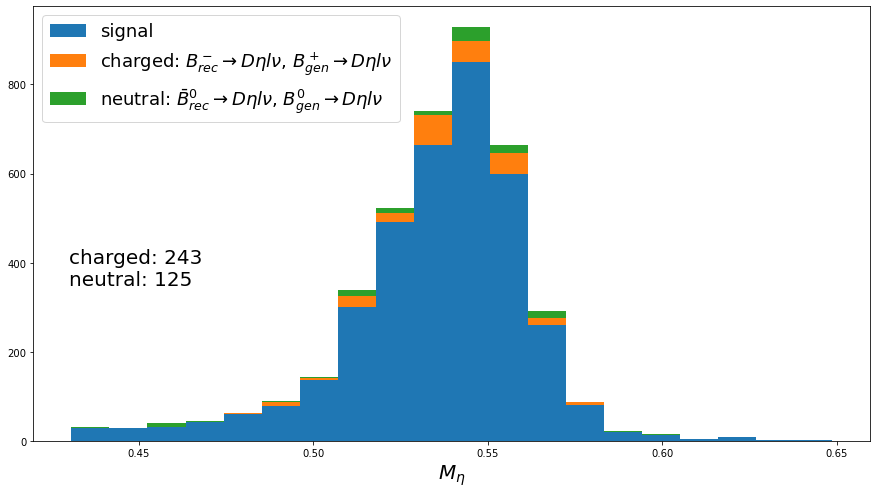

In [20]:
# checking how many of signals were taken as signal by mistake, because I didn't specify which B should be generated as Detalnu
# aparantly some of B which have been generated as Detalnu were reconstructed as Dlnu
sig_pkbkg = df.drop(index = 'combinatorial background').reset_index(drop=True)

eta_InvM_sig = pd.concat([sig_pkbkg['pi4_B0_InvM'], sig_pkbkg['pi4_B1_InvM']]).dropna()

problem_charged = pd.concat(
    [
        sig_pkbkg[(sig_pkbkg['B0_decayModeID']<500) & (abs(sig_pkbkg['aBminusMode'])%10000).isin([1019,1020,1039,1040])]['pi4_B1_InvM']
        ,
        sig_pkbkg[(sig_pkbkg['B1_decayModeID']<500) & (sig_pkbkg['aBplusMode']%10000).isin([1019,1020,1039,1040])]['pi4_B0_InvM']
    ]
).dropna()

problem_neutral = pd.concat(
    [
        sig_pkbkg[(sig_pkbkg['B0_decayModeID']<500) & (abs(sig_pkbkg['aBbar0Mode'])%10000).isin([1017,1018,1035,1036])]['pi4_B1_InvM']
        ,
        sig_pkbkg[(sig_pkbkg['B1_decayModeID']<500) & (sig_pkbkg['aB0Mode']%10000).isin([1017,1018,1035,1036])]['pi4_B0_InvM']
    ]
).dropna()

plt.figure(figsize=(15, 8))
c, e, _ = plt.hist([eta_InvM_sig, problem_charged, problem_neutral], bins=20, histtype='barstacked', label=['signal', r'charged: $B_{rec}^-\rightarrow D\eta l\nu$, $B_{gen}^+\rightarrow D\eta l\nu$', r'neutral: $\bar{B}_{rec}^0\rightarrow D\eta l\nu$, $B_{gen}^0\rightarrow D\eta l\nu$'])
plt.xlabel('$M_{\eta}$', fontdict=form_label)
plt.text(0.43,350, f'charged: {len(problem_charged)} \nneutral: {len(problem_neutral)}', fontsize=20)
plt.legend(fontsize=18, loc='upper left')

# Checking if the function still has the same problem of taking the wrong signal
### Ex. B0 is reconstructed as $D\eta l \nu$ but the B1 is generated as $D\eta l\nu$ and I took it as signal

In [21]:
# slitting the data using the function that I defined
dfp_eta_func, rec_modep_eta, gen_modep_eta = sig_bkg_spliter('charged','eta', data)
df0_eta_func, rec_mode0_eta, gen_mode0_eta = sig_bkg_spliter('mixed','eta', data)
df_eta_func = pd.concat([dfp_eta_func, df0_eta_func])

## Check if there's a duplicates

In [24]:
duplicates = df_eta_func.duplicated()
df_eta_func[duplicates]
# in case there was duplicates
# df_eta_func_noduplicates = df_eta_func.drop_duplicates()

,,__experiment__,__run__,__event__,__production__,__candidate__,__ncandidates__,__weight__,Ecms,aBminusMode,aBplusMode,aB0Mode,aBbar0Mode,aDstminusMode,aDstplusMode,aDminusMode,aDplusMode,aD0Mode,aDbar0Mode,ECM,pCM,InvM,cosThCM,phiCM,PDG,nROE_Ch,nROE_ECL,nROE_KL,nROE_gam,Q_ROE,M_ROE,Eextra_ROE,R2,cosTBTO,M_roepi0,pCM_roepi0,phiCM_roepi0,cosThCM_roepi0,ECM_roegam,phiCM_roegam,cosThCM_roegam,pCM_roepi,phiCM_roepi,cosThCM_roepi,q_roepi,isSignal,Y4Sprod,Y4Sproduct,Y4SScore,Y4SScore4,decayModeID,cosBY0,cosBY1,cosDel,cosDelRange,B0_ECM,B0_pCM,B0_InvM,B0_cosThCM,B0_phiCM,B0_PDG,B0_BchiProb,B0_BflightDistance,B0_BflightDistanceErr,B0_B_dr,B0_B_dz,B0_B_x,B0_B_y,B0_B_z,B0_B_x_uncertainty,B0_B_y_uncertainty,B0_B_z_uncertainty,B0_isSignal,B0_mcErrors,B0_mcPDG,B0_genMotherID_0,B0_genMotherPDG_0,B0_genMotherPDG_1,B0_isSignalAcceptMissing,B0_decayModeID,B0_cosBY,B0_Pi0orEtaScore,B1_ECM,B1_pCM,B1_InvM,B1_cosThCM,B1_phiCM,B1_PDG,B1_BchiProb,B1_BflightDistance,B1_BflightDistanceErr,B1_B_dr,B1_B_dz,B1_B_x,B1_B_y,B1_B_z,B1_B_x_uncertainty,B1_B_y_uncertainty,B1_B_z_uncertainty,B1_isSignal,B1_mcErrors,B1_mcPDG,B1_genMotherID_0,B1_genMotherPDG_0,B1_genMotherPDG_1,B1_isSignalAcceptMissing,B1_decayModeID,B1_cosBY,B1_Pi0orEtaScore,e_B0_ECM,e_B0_pCM,e_B0_InvM,e_B0_cosThCM,e_B0_phiCM,e_B0_PDG,e_B0_isSignal,e_B0_mcErrors,e_B0_mcPDG,e_B0_genMotherID_0,e_B0_genMotherPDG_0,e_B0_genMotherPDG_1,e_B0_isSignalAcceptMissing,e_B0_electronID,e_B0_muonID,e_B1_ECM,e_B1_pCM,e_B1_InvM,e_B1_cosThCM,e_B1_phiCM,e_B1_PDG,e_B1_isSignal,e_B1_mcErrors,e_B1_mcPDG,e_B1_genMotherID_0,e_B1_genMotherPDG_0,e_B1_genMotherPDG_1,e_B1_isSignalAcceptMissing,e_B1_electronID,e_B1_muonID,D_B0_ECM,D_B0_pCM,D_B0_InvM,D_B0_cosThCM,D_B0_phiCM,D_B0_PDG,D_B0_BFInvM,D_B0_DchiProb,D_B0_DflightDistance,D_B0_DflightDistanceErr,D_B0_mcECM,D_B0_mcPCM,D_B0_mcThetaCM,D_B0_mcPhiCM,D_B0_isSignal,D_B0_mcErrors,D_B0_mcPDG,D_B0_genMotherID_0,D_B0_genMotherPDG_0,D_B0_genMotherPDG_1,D_B0_genMotherPDG_2,D_B0_isSignalAcceptMissing,D_B0_decayModeID,D_B1_ECM,D_B1_pCM,D_B1_InvM,D_B1_cosThCM,D_B1_phiCM,D_B1_PDG,D_B1_BFInvM,D_B1_DchiProb,D_B1_DflightDistance,D_B1_DflightDistanceErr,D_B1_mcECM,D_B1_mcPCM,D_B1_mcThetaCM,D_B1_mcPhiCM,D_B1_isSignal,D_B1_mcErrors,D_B1_mcPDG,D_B1_genMotherID_0,D_B1_genMotherPDG_0,D_B1_genMotherPDG_1,D_B1_genMotherPDG_2,D_B1_isSignalAcceptMissing,D_B1_decayModeID,D_0_B0_ECM,D_0_B0_pCM,D_0_B0_InvM,D_0_B0_cosThCM,D_0_B0_phiCM,D_0_B0_PDG,D_0_B0_BFInvM,D_0_B0_DchiProb,D_0_B0_DflightDistance,D_0_B0_DflightDistanceErr,D_0_B0_mcECM,D_0_B0_mcPCM,D_0_B0_mcThetaCM,D_0_B0_mcPhiCM,D_0_B0_isSignal,D_0_B0_mcErrors,D_0_B0_mcPDG,D_0_B0_genMotherID_0,D_0_B0_genMotherPDG_0,D_0_B0_genMotherPDG_1,D_0_B0_genMotherPDG_2,D_0_B0_isSignalAcceptMissing,D_0_B0_decayModeID,D_0_0_B0_ECM,D_0_0_B0_pCM,D_0_0_B0_InvM,D_0_0_B0_cosThCM,D_0_0_B0_phiCM,D_0_0_B0_PDG,D_0_0_B0_mcECM,D_0_0_B0_mcPCM,D_0_0_B0_mcThetaCM,D_0_0_B0_mcPhiCM,D_0_0_B0_isSignal,D_0_0_B0_mcErrors,D_0_0_B0_mcPDG,D_0_0_B0_genMotherID_0,D_0_0_B0_genMotherPDG_0,D_0_0_B0_genMotherPDG_1,D_0_0_B0_genMotherPDG_2,D_0_0_B0_isSignalAcceptMissing,D_0_0_0_B0_ECM,D_0_0_0_B0_pCM,D_0_0_0_B0_InvM,D_0_0_0_B0_cosThCM,D_0_0_0_B0_phiCM,D_0_0_0_B0_PDG,D_0_0_0_B0_mcECM,D_0_0_0_B0_mcPCM,D_0_0_0_B0_mcThetaCM,D_0_0_0_B0_mcPhiCM,D_0_0_0_B0_isSignal,D_0_0_0_B0_mcErrors,D_0_0_0_B0_mcPDG,D_0_0_0_B0_genMotherID_0,D_0_0_0_B0_genMotherPDG_0,D_0_0_0_B0_genMotherPDG_1,D_0_0_0_B0_genMotherPDG_2,D_0_0_0_B0_isSignalAcceptMissing,D_0_0_1_B0_ECM,D_0_0_1_B0_pCM,D_0_0_1_B0_InvM,D_0_0_1_B0_cosThCM,D_0_0_1_B0_phiCM,D_0_0_1_B0_PDG,D_0_0_1_B0_mcECM,D_0_0_1_B0_mcPCM,D_0_0_1_B0_mcThetaCM,D_0_0_1_B0_mcPhiCM,D_0_0_1_B0_isSignal,D_0_0_1_B0_mcErrors,D_0_0_1_B0_mcPDG,D_0_0_1_B0_genMotherID_0,D_0_0_1_B0_genMotherPDG_0,D_0_0_1_B0_genMotherPDG_1,D_0_0_1_B0_genMotherPDG_2,D_0_0_1_B0_isSignalAcceptMissing,D_0_1_B0_ECM,D_0_1_B0_pCM,D_0_1_B0_InvM,D_0_1_B0_cosThCM,D_0_1_B0_phiCM,D_0_1_B0_PDG,D_0_1_B0_mcECM,D_0_1_B0_mcPCM,D_0_1_B0_mcThetaCM,D_0_1_B0_mcPhiCM,D_0_1_B0_isSignal,D_0_1_B0_mcErrors,D_0_1_B0_mcPDG,D_0_1_B0_ge

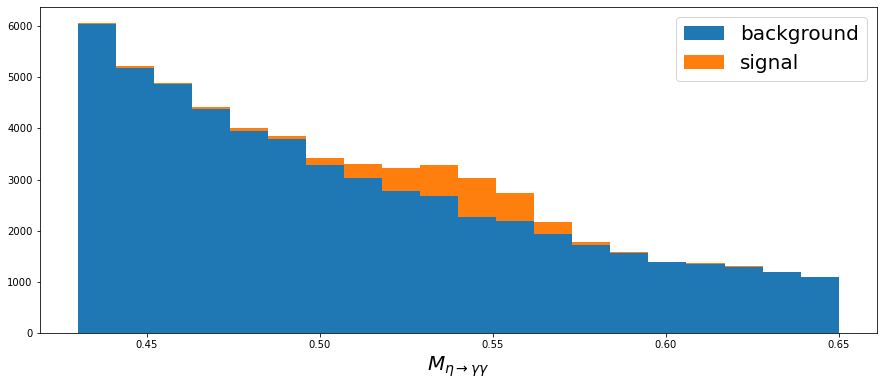

In [112]:
# taking signal and background, signal is signal and the peaking background
eta_sig_func = df_eta_func.drop(index='combinatorial background').reset_index(drop=True)
eta_bkg_func = df_eta_func.loc['combinatorial background']

# combining the invariant mass of gamma gamma coming from both B0 and B1
eta_InvM_sig_func = pd.concat([eta_sig_func['pi4_B0_InvM'], eta_sig_func['pi4_B1_InvM']]).dropna()
eta_InvM_bkg_func = pd.concat([eta_bkg_func['pi4_B0_InvM'], eta_bkg_func['pi4_B1_InvM']]).dropna()

# plotting signal and background using my function
plt.figure(figsize=(15,6))
eta_count_InvM_func, eta_edge_InvM_func, _ = plt.hist([eta_InvM_bkg_func,eta_InvM_sig_func], histtype='barstacked', bins=20, label=['background', 'signal'])
plt.xlabel(r'$M_{\eta \rightarrow \gamma\gamma}$', fontdict=form_label)
plt.legend(fontsize=20)

Bellow shows that the difference between after correction and before correction(360) is not the same as number of times that we made a mistake(368), seems like still we made mistake in the function 8 times.

In [28]:
# how many signal enteries do we have
print(np.sum(eta_count_InvM_func[1]-eta_count_InvM_func[0]))
# how many times we made a mistake
print(f'''the difference between after correction and before correction: {abs(np.sum(eta_count_InvM_func[1]-eta_count_InvM_func[0])-np.sum(counts[1]-counts[0]))}
the number of times that we madee a mistake: {243+125}''')

3353.0
the difference between after correction and before correction: 360.0
the number of times that we madee a mistake: 368


In [43]:
# charged
# using the function for charged Bs to see if still the problem exist even after the correction to the function
c1 = dfp_eta_func[
    ( (dfp_eta_func['B0_decayModeID']<500) & (abs(dfp_eta_func['aBminusMode'])%10000).isin([1019,1020,1039,1040]) )
    |
    ( (dfp_eta_func['B1_decayModeID']<500) & (dfp_eta_func['aBplusMode']%10000).isin([1019,1020,1039,1040]) )
]

c1

__experiment__  __run__  __event__  \
signal                   678207            1003        0   37014035   
                         678208            1003        0   37014035   
                         678209            1003        0   37014035   
                         678211            1003        0   37014035   
                         678212            1003        0   37014035   
...                                         ...      ...        ...   
combinatorial background 786215            1003        0   24311593   
                         787806            1003        0   29878168   
                         787807            1003        0   29878168   
                         787808            1003        0   29878168   
                         787809            1003        0   29878168   

                                 __production__  __candidate__  \
signal                   678207           24820              0   
                         678208           24820              1   
                         678209           24820              2   
                         678211           24820              4   
                         678212           24820              5   
...                                         ...            ...   
combinatorial background 786215           24820              7   
                         787806           24820              4   
                         787807           24820              5   
                         787808           24820              6   
                         787809           24820              7   

                                 __ncandidates__  __weight__       Ecms  \
signal                   678207                9         1.0  10.579557   
                         678208                9         1.0  10.579557   
                         678209                9         1.0  10.579557   
                         678211                9         1.0  10.579557   
                         678212                9         1.0  10.579557   
...                                          ...         ...        ...   
combinatorial background 786215                9         1.0  10.579557   
                         787806                9         1.0  10.579557   
                         787807                9         1.0  10.579557   
                         787808                9         1.0  10.579557   
                         787809                9         1.0  10.579557   

                                 aBminusMode  aBplusMode  ...  MCGenPDG_45  \
signal                   678207      -1039.0      1020.0  ...         22.0   
                         678208      -1039.0      1020.0  ...         22.0   
                         678209      -1039.0      1020.0  ...         22.0   
                         678211      -1039.0      1020.0  ...         22.0   
                         678212      -1039.0      1020.0  ...         22.0   
...                                      ...         ...  ...          ...   
combinatorial background 786215      -1039.0      1001.0  ...          NaN   
                         787806      -1002.0    101019.0  ...          NaN   
                         787807      -1002.0    101019.0  ...          NaN   
                         787808      -1002.0    101019.0  ...          NaN   
                         787809      -1002.0    101019.0  ...          NaN   

                                 MCGenMothIndex_45  MCGenPDG_46  \
signal                   678207               27.0          NaN   
                         678208               27.0          NaN   
                         678209               27.0          NaN   
                         678211               27.0          NaN   
                         678212               27.0          NaN   
...                                            ...          ...   
combinatorial background 786215                NaN          NaN   
             

In [44]:
len(c1.loc['signal'])

8

In [84]:
# using the function for mixed Bs
n1 = df0_eta_func[
    ((df0_eta_func['B0_decayModeID']<500) & (abs(df0_eta_func['aBbar0Mode'])%10000).isin([1017,1018,1035,1036]))
    |
    ((df0_eta_func['B1_decayModeID']<500) & (df0_eta_func['aB0Mode']%10000).isin([1017,1018,1035,1036]))
]
n1

__experiment__  __run__  __event__  \
combinatorial background 1929              1003        0   25578865   
                         2046              1003        0   36561766   
                         4665              1003        0   17894749   
                         5867              1003        0   33901681   
                         20042             1003        0   19883881   
...                                         ...      ...        ...   
                         427847            1003        0   87835928   
                         427848            1003        0   87835928   
                         427849            1003        0   87835928   
                         427854            1003        0   87835928   
                         427855            1003        0   87835928   

                                 __production__  __candidate__  \
combinatorial background 1929             24821              0   
                         2046             24821              1   
                         4665             24821              2   
                         5867             24821              5   
                         20042            24821              2   
...                                         ...            ...   
                         427847           24825              0   
                         427848           24825              1   
                         427849           24825              2   
                         427854           24825              7   
                         427855           24825              8   

                                 __ncandidates__  __weight__       Ecms  \
combinatorial background 1929                  1         1.0  10.579557   
                         2046                  4         1.0  10.579557   
                         4665                  4         1.0  10.579557   
                         5867                  8         1.0  10.579557   
                         20042                 9         1.0  10.579557   
...                                          ...         ...        ...   
                         427847                9         1.0  10.579557   
                         427848                9         1.0  10.579557   
                         427849                9         1.0  10.579557   
                         427854                9         1.0  10.579557   
                         427855                9         1.0  10.579557   

                                 aBminusMode  aBplusMode  ...  MCGenPDG_45  \
combinatorial background 1929          -99.0       -99.0  ...          NaN   
                         2046          -99.0       -99.0  ...          NaN   
                         4665          -99.0       -99.0  ...          NaN   
                         5867          -99.0       -99.0  ...          NaN   
                         20042         -99.0       -99.0  ...        211.0   
...                                      ...         ...  ...          ...   
                         427847        -99.0       -99.0  ...          NaN   
                         427848        -99.0       -99.0  ...          NaN   
                         427849        -99.0       -99.0  ...          NaN   
                         427854        -99.0       -99.0  ...          NaN   
                         427855        -99.0       -99.0  ...          NaN   

                                 MCGenMothIndex_45  MCGenPDG_46  \
combinatorial background 1929                  NaN          NaN   
                         2046                  NaN          NaN   
                         4665                  NaN          NaN   
                         5867                  NaN          NaN   
                         20042                37.0       -211.0   
...                                            ...          ...   
                         427847                NaN          NaN   
             

## Seems like in charged B we still have this problem, why?
<font color='blue'>The reason is that I didn't pick the best candidate

The idea is that I will split the data-set into different groups based on event, so each event  with all entries will be one group, and for the best candidate I will take the first candidate in each group which is the minimum value of variable `__candidate__`. Plus I'll take the average of the rest in each group as background because they're not the best candidate.

In [22]:
# I dropped combinatorial background from the whole data set (charged and mixed)
# but all will be charged because we didn't have the same problem with mixed Bs
eta_sig_func = df_eta_func.drop(index = 'combinatorial background').reset_index(drop=True)

In [23]:
# now I split the data-set into different groups
eta_sig_grouped = eta_sig_func.groupby(['__event__'])

# let's check how many groups we get, also what's the length of event will all duplicated values
print(f'number of groups: {len(eta_sig_grouped)} \nlength of event variable (including the duplicated values): {len(eta_sig_func["__event__"])}')

number of groups: 1476 
length of event variable (including the duplicated values): 3353


### First let's look at the min value of `__candidate__` for each group
But here it will only give me the `__event__` number and the `__candidate__`

In [27]:
# reset_index() will give us a table including the event and candidate
mincand = eta_sig_grouped['__candidate__'].min().reset_index()
mincand

,__event__,__candidate__
0,45823,2
1,173299,1
2,336856,0
3,440042,1
4,451012,1
...,...,...
1471,107411488,0
1472,107461660,0
1473,107785543,1
1474,107908756,0


### Below it keeps all the columns and finds the row with the minimum `__candidate__` value as the best candidate, and take the rest as nobest candidaet.
<font color='blue'>Note: signal here includes both best and not best candidates.

<font color='blue'>Note: there are duplicates in the no best candidate data-set. So I should groupby it again (for no best candidate).

In [31]:
# the whole data set with best candidate(minmum value for __candidate__)
eta_sig_bestcan, eta_sig_nobestcan = mincand_eachevent(eta_sig_func)

display(Latex(rf'''
Length of $\eta_{{signal}}$ best candidate: {len(eta_sig_bestcan['__candidate__'])}$\\$
Length of $\eta_{{signal}}$ no best candidate (with duplicates): {len(eta_sig_nobestcan['__candidate__'])}$\\$
Length of both best and no best candidate $\eta_{{signal}}$ groups (with duplicates): {len(eta_sig_bestcan['__candidate__']) + len(eta_sig_nobestcan['__candidate__'])}
'''
))

<IPython.core.display.Latex object>

### Looking at the $M_{\eta_{signal} \rightarrow \gamma\gamma}$ for best candidate and nobest candidate for each group (no duplicate)

In [39]:
# Note: I didn't group best candidate bc from each group I picked the first one,
# so splitting to different groups is not needed.
# Therefore, the length of M_eta best candidate and data grouped by event are the same

eta_sig_InvM_bestcan = pd.concat([
    eta_sig_bestcan['pi4_B0_InvM'], eta_sig_bestcan['pi4_B1_InvM']
]).dropna()

eta_sig_nobestcan_grouped = eta_sig_nobestcan.groupby(['__event__'])
eta_sig_InvM_nobestcan = pd.concat([
    eta_sig_nobestcan_grouped['pi4_B0_InvM'].mean(),
    eta_sig_nobestcan_grouped['pi4_B1_InvM'].mean()
]).dropna()

#### Let's look at the length of best and nobest candidate groups (no doplicates)
Based on what we see bellow for nobest candidates in some events one of the entries B0 goes to $D\eta l\nu$ and in the same event another entry goes to $D\eta l\nu$. <font color='blue'>Therefore, as you see after cocating $M_{\eta_{B0}}$ and $M_{\eta_{B1}}$ in number 5, the length is larger than number 3 which the groups of events for no best candidates.</font>

In [40]:
display(Latex(rf'''
1. Length of data grouped by event: {len(eta_sig_grouped)}$\\$
2. Length of $\eta_{{signal}}$ best candidate group (no duplicates): {len(eta_sig_bestcan)}$\\$
3. Length of $\eta_{{signal}}$ nobest candidate group (no duplicates): {len(eta_sig_nobestcan_grouped)}$\\$
4. Length of $M_{{\eta_{{signal}}}}$ best canidate (no duplicates): {len(eta_sig_InvM_bestcan)}$\\$
5. Length of $M_{{\eta_{{signal}}}}$ nobest candidate (no duplicates): {len(eta_sig_InvM_nobestcan)}
'''))

<IPython.core.display.Latex object>

In [159]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
    

In [175]:
# I took part of the tables
g_B1 = eta_sig_nobestcan_grouped['pi4_B0_InvM'].mean().dropna().reset_index()
g_B2 = eta_sig_nobestcan_grouped['pi4_B1_InvM'].mean().dropna().reset_index()
display_side_by_side(g_B1.iloc[:10,:], g_B2[:10], titles=[r'No best candidate: $M_{\eta \rightarrow \gamma\gamma}-B0$', r'$M_{\eta \rightarrow \gamma\gamma}-B1$'])

are_event_equal = (g_B1['__event__'].isin(g_B2['__event__'])).sum()
print(f'''
Length of table1 (B0): {len(g_B1)}
Length of table2 (B2): {len(g_B2)}
Number of equal events in these two tables: {are_event_equal}
''')

,__event__,pi4_B0_InvM
0,45823,0.431690
1,336856,0.539911
2,495154,0.520673
3,613062,0.520374
4,654609,0.589233
5,685978,0.549983
6,691568,0.531972
7,1204269,0.531410
8,1255540,0.472017
9,1396506,0.466063



Length of table1 (B0): 435
Length of table2 (B2): 469
Number of equal events in these two tables: 25



# Bob's way to rewrite the best candidate

In [38]:
eta_sig_bBestcan = bBest_cand_newcolumn(eta_sig_func)
eta_sig_bBestcan['bBest'].value_counts()

0.0    3033
1.0     121
2.0      54
5.0      41
3.0      31
4.0      24
6.0      21
7.0      18
8.0      10
Name: bBest, dtype: int64

In [81]:
eta_sig_bBestcan.query(mycand)['bBest'].value_counts(), len(eta_sig_bBestcan.query(mycand)['bBest'])

(0.0    792
 1.0     32
 5.0     14
 2.0     14
 3.0     11
 4.0      8
 7.0      7
 6.0      6
 8.0      5
 Name: bBest, dtype: int64,
 889)

In [84]:
eta_sig_bBestcan.query(mycand)['__candidate__'].value_counts()

0    792
1     32
5     14
2     14
3     11
4      8
7      7
6      6
8      5
Name: __candidate__, dtype: int64

As it's shown bellow the length of grouped dataset based on event is the same as the dataset before getting splitted means that in each event we picked only one candidate.

In [85]:
# checking if there's any duplicates in the event, two candidates in the same event
len(eta_sig_bBestcan.query(mycand).groupby(['__event__'])['__candidate__'])

889

# Comparing the bBestcan and bestcan
I plot both to check which candidate will pass each filter

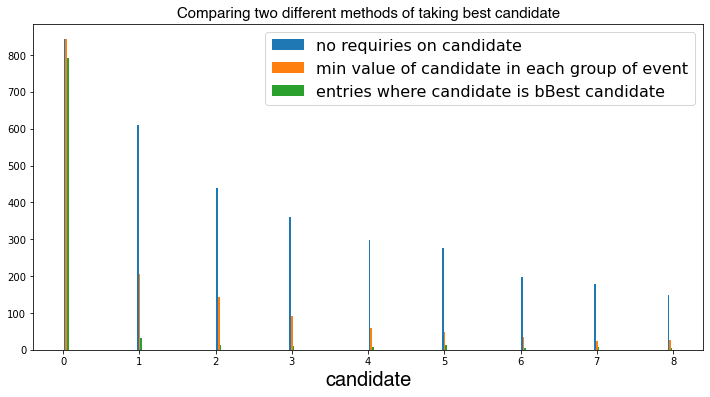

In [79]:
plt.figure(figsize=(12,6))
plt.hist([eta_sig_func['__candidate__'],eta_sig_bestcan['__candidate__'], eta_sig_bBestcan.query(mycand)['__candidate__']], bins=100, label=['no requiries on candidate','min value of candidate in each group of event', 'entries where candidate is bBest candidate'])
plt.title('Comparing two different methods of taking best candidate', fontdict=form_title)
plt.xlabel('candidate', fontdict=form_label)
plt.legend(fontsize=16)

# Let's compare different method of picking best candidate for `signal`

In [109]:
# first candidate from each group of event (as you see above it can even be 8)
eta_sig_InvM_bestcan = eta_sig_InvM_bestcan
# only candidate 0
eta_sig_InvM_cand0 = pd.concat([
    eta_sig_func.query(cand0)['pi4_B0_InvM'], eta_sig_func.query(cand0)['pi4_B1_InvM']
]).dropna()
# bBest candidate
eta_sig_InvM_bBestcan = pd.concat([
    eta_sig_bBestcan.query(mycand)['pi4_B0_InvM'], eta_sig_bBestcan.query(mycand)['pi4_B1_InvM']
]).dropna()


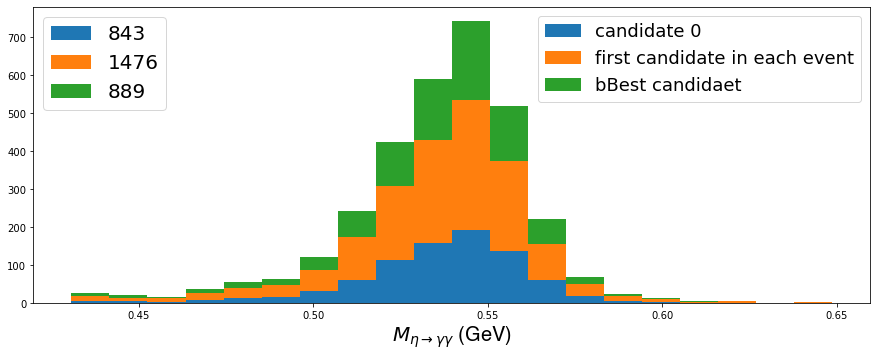

In [111]:
plt.figure(figsize=(15,12))

plt.subplot(211)
count, edges, _ = plt.hist([eta_sig_InvM_cand0, eta_sig_InvM_bestcan, eta_sig_InvM_bBestcan], histtype='barstacked', bins=20,label=['candidate 0', 'first candidate in each event', 'bBest candidaet'])
plt.xlabel(r'$M_{\eta\rightarrow \gamma\gamma}$ (GeV)', fontdict=form_label)
legend = plt.legend([f'{len(eta_sig_InvM_cand0)}', f'{len(eta_sig_InvM_bestcan)}', f'{len(eta_sig_InvM_bBestcan)}'], loc=2, fontsize=20)
plt.legend(fontsize=18, loc=1)
plt.gca().add_artist(legend)

# Signal and background with different methods of best candidate

In [138]:
# background data
# candidate 0
eta_bkg_cand0 = eta_bkg_func.query(cand0)
# first candidate in each event
eta_bkg_bestcan, eta_bkg_nobestcan= mincand_eachevent(eta_bkg_func)
# bBest candiate
eta_bkg_bBestcan = bBest_cand_newcolumn(eta_bkg_func).query(mycand)

# Invariant mass
# candidate 0
eta_bkg_InvM_cand0 = pd.concat([
    eta_bkg_cand0['pi4_B0_InvM'], eta_bkg_cand0['pi4_B1_InvM']
]).dropna()
# first candidate in each event
eta_bkg_InvM_bestcan = pd.concat([
    eta_bkg_bestcan['pi4_B0_InvM'], eta_bkg_bestcan['pi4_B1_InvM']
]).dropna()
# bBest candidate
eta_bkg_InvM_bBestcan = pd.concat([
    eta_bkg_bBestcan['pi4_B0_InvM'], eta_bkg_bBestcan['pi4_B1_InvM']
]).dropna()

In [140]:
len(eta_bkg_bBestcan), len(eta_bkg_bestcan)

(11612, 18556)

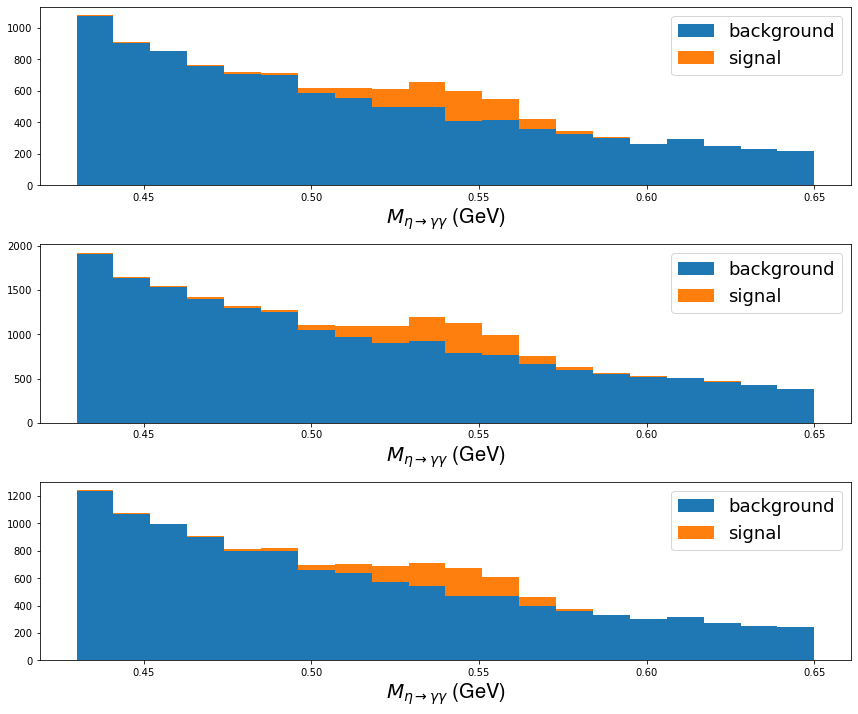

In [141]:
fig,ax = plt.subplots(3,1,figsize=(12,10))

count_cand0, edge_cand0, _ = ax[0].hist([eta_bkg_InvM_cand0, eta_sig_InvM_cand0], bins=20, histtype='barstacked',label=['background','signal'])
ax[0].set_xlabel(r'$M_{\eta\rightarrow \gamma\gamma}$ (GeV)', fontdict=form_label)
ax[0].legend(fontsize=18)
count_bestcan, edge_bestcan, _ = ax[1].hist([eta_bkg_InvM_bestcan, eta_sig_InvM_bestcan], bins=20, histtype='barstacked',label=['background','signal'])
ax[1].set_xlabel(r'$M_{\eta\rightarrow \gamma\gamma}$ (GeV)', fontdict=form_label)
ax[1].legend(fontsize=18)
count_bBestcan, edge_bBestcan, _ = ax[2].hist([eta_bkg_InvM_bBestcan, eta_sig_InvM_bBestcan], bins=20, histtype='barstacked',label=['background','signal'])
ax[2].set_xlabel(r'$M_{\eta\rightarrow \gamma\gamma}$ (GeV)', fontdict=form_label)
ax[2].legend(fontsize=18)

plt.tight_layout(pad=1.0)